Alexander Beckwith

Math 855 - Prob w/ Applications

Chapter 4 Suggested Problems


In [38]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Chapter 3: Problems 1(b), 9(a,b), 17(c), 18(a,b,c,d), 20, 44, 46, 47, 50 and 60.

50. Suppose that X , where i = 1, . . . , n, are independent random variables with
 i 􏰑n
E(Xi) = μ and Var(Xi) = σ2. Let X = n−1 and Var(X) = σ2/n.

In [ ]:
"""
E(Xbar) = E( sum(Xi...) / n) = (1/n) * sum(E(X)i...) = (1 / n) * n * E(X) = E(X)
so
E(Xbar) = μ

Var(Xbar) = Var( sum(Xi...) / n ) = (1 / n^2) * Sum(Var(X)i...) = (1 / n^2) * n * Var(X) = Var(X) / n
so
Var(Xbar) = σ^2 / n
"""


54. Let X, Y, and Z be uncorrelated random variables with variances σX2, σY2, and
σZ2 , respectively. Let
U=Z+X V=Z+Y
Find Cov(U, V) and ρUV .

In [ ]:
"""
U = Z + X 
V = Z + Y
Correlation Coefficient = rhoUV = Cov(U, V) / sqrt(Var(U) * Var(V))
rhoUV = Cov(Z + X, Z + Y) / sqrt(Var(Z + X) * Var(Z + Y)) 
rhoUV = Var(Z) / sqrt((Var(Z) + Var(X)) * (Var(Z) + Var(Y))) 

"""

59. Let (X, Y) be a random point uniformly distributed on a unit disk. Show that Cov(X, Y) = 0, but that X and Y are not independent.

In [ ]:
"""

"""


62. Let X and Y have the joint distribution given in Problem 1 of Chapter 3.
a. Find the covariance and correlation of X and Y .
b. Find E(Y|X = x) for x = 1, 2, 3, 4. Find the probability mass function of
the random variable E(Y|X).

In [21]:
axes = {"x": 0, "y": 1}
xy_vals = [n + 1 for n in range(4)]
marg_freq = np.array(
    [
        [0.10, 0.05, 0.02, 0.02],
        [0.05, 0.20, 0.05, 0.02],
        [0.02, 0.05, 0.20, 0.04],
        [0.02, 0.02, 0.04, 0.10],
    ]
)
print("We can represent the table as an array:")
print(marg_freq,"\n")

y_marg = np.sum(marg_freq, axis=axes["x"])
x_marg = np.sum(marg_freq, axis=axes["y"])

y_sum_x1 = y_marg[0]
x_sum_y1 = x_marg[0]

x_when_y1 = [round(n / x_sum_y1, 4) for n in marg_freq[0]]
y_when_x1 = [round(row[0] / y_sum_x1, 4) for row in marg_freq]
x_when_y1

We can represent the table as an array:
[[0.1  0.05 0.02 0.02]
 [0.05 0.2  0.05 0.02]
 [0.02 0.05 0.2  0.04]
 [0.02 0.02 0.04 0.1 ]] 



[0.5263, 0.2632, 0.1053, 0.1053]

In [30]:
get_marg = lambda plist: np.array([x / sum(plist) for x in plist])
marg_y_given_x = get_marg(marg_freq.T)
exp_y_given_x = [[marg_y_given_x[i][j]*xy_vals[i] for i in range(len(xy_vals))] for j in range(len(xy_vals))]

array([[0.5263, 0.5263, 0.3158, 0.4211],
       [0.1562, 1.25  , 0.4688, 0.25  ],
       [0.0645, 0.3226, 1.9355, 0.5161],
       [0.1111, 0.2222, 0.6667, 2.2222]])

In [14]:
# the marginal frequencies of x and y are identical, as are their sequences.
# therefore, E(x) = E(y)
exp_x = sum([xy_vals[i] * x_marg[i] for i in range(len(x_marg))])
exp_y = sum([xy_vals[i] * y_marg[i] for i in range(len(x_marg))])
xy_range = range(len(xy_vals))
xy_prod_vals = [[x*y for x in xy_vals] for y in xy_vals]
exp_xy = sum([sum([xy_prod_vals[i][j] * marg_freq[i][j] for i in xy_range]) for j in xy_range])
print("E(X) = ", exp_x)
print("E(Y) = ", exp_y)
# covariance = E(XY) - E(X)*E(Y)

print("E(XY) = ", exp_xy)
cov_xy = round(exp_xy - (exp_x * exp_y), 4)
print("Cov(XY) = ", cov_xy)

E(X) =  2.48
E(Y) =  2.48
E(XY) =  6.66
Cov(XY) =  0.5096


In [20]:
# Var(X) = E((x - mu)^2)
mean = lambda _list: sum(_list) / len(_list)
def var(_list: list, plist: list):
    _mean = mean(_list)
    difs = [x - _mean for x in _list]
    sq_difs = [y ** 2 for y in difs]
    apply_probs = [sq_difs[i] * plist[i] for i in range(len(_list))]
    return sum(apply_probs)
var_x = var(xy_vals, x_marg)
var_y = var(xy_vals, y_marg)

#corellation_coefficient
cc_xy = cov_xy / sqrt(var_x * var_y)
round(cc_xy, 4)

0.5147

63. Let X and Y have the joint distribution given in Problem 8 of Chapter 3.
a. Find the covariance and correlation of X and Y . b. FindE(Y|X=x)for0≤x≤1.

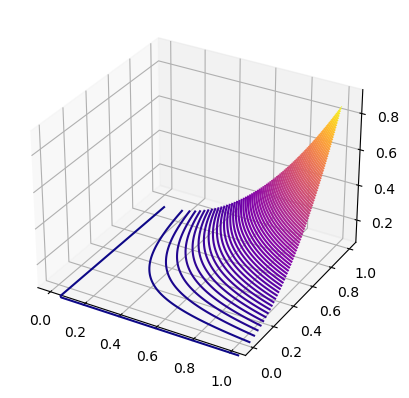

In [45]:
fig = plt.figure()
ax = plt.axes(projection="3d")
plt.axis("scaled")

spacing = 100
x = np.linspace(0, 1, spacing)
y = np.linspace(0, 1, spacing)
xx, yy = np.meshgrid(x, y)

@np.vectorize
def f(x, y):
    return (6 / 7) * (x * y) ** 2

zz = f(xx, yy)

ax.contour3D(xx, yy, zz, 100, cmap="plasma")

79. Let X be a discrete random variable that takes on values 0, 1, 2 with probabilities 12, 38, 18, respectively. Find the moment-generating function of X, M(t), and
verify that E(X) = M′(0) and that E(X2) = M′′(0).

80. Let X be a continuous random variable with density function f(x) = 2x, 0 ≤ x ≤ 1. Find the moment-generating function of X, M(t), and verify that E(X) = M′(0) and that E(X2) = M′′(0).

89. Let X , X , . . . , X be independent normal random variables with means 12n 􏰑n
μ and variances σ2. Show that Y = α X , where the α are scalars, i i i=1ii i
is normally distributed, and find its mean and variance. (Hint: Use moment- generating functions.)